# Problem :- 253 Meeting Rooms II

Given an array of meeting time intervals intervals where intervals[i] = [starti, endi], return the minimum number of conference rooms required.

 

Example 1:

Input: intervals = [[0,30],[5,10],[15,20]]
Output: 2
Example 2:

Input: intervals = [[7,10],[2,4]]
Output: 1

# Cases

For solving this problem 

Separate out the start times and the end times in their separate arrays.

Sort the start times and the end times separately. Note that this will mess up the original correspondence of start times and end times. They will be treated individually now.

We consider two pointers: s_ptr and e_ptr which refer to start pointer and end pointer. The start pointer simply iterates over all the meetings and the end pointer helps us track if a meeting has ended and if we can reuse a room.

When considering a specific meeting pointed to by s_ptr, we check if this start timing is greater than the meeting pointed to by e_ptr. If this is the case then that would mean some meeting has ended by the time the meeting at s_ptr had to start. So we can reuse one of the rooms. Otherwise, we have to allocate a new room.

If a meeting has indeed ended i.e. if start[s_ptr] >= end[e_ptr], then we increment e_ptr.

Repeat this process until s_ptr processes all of the meetings.

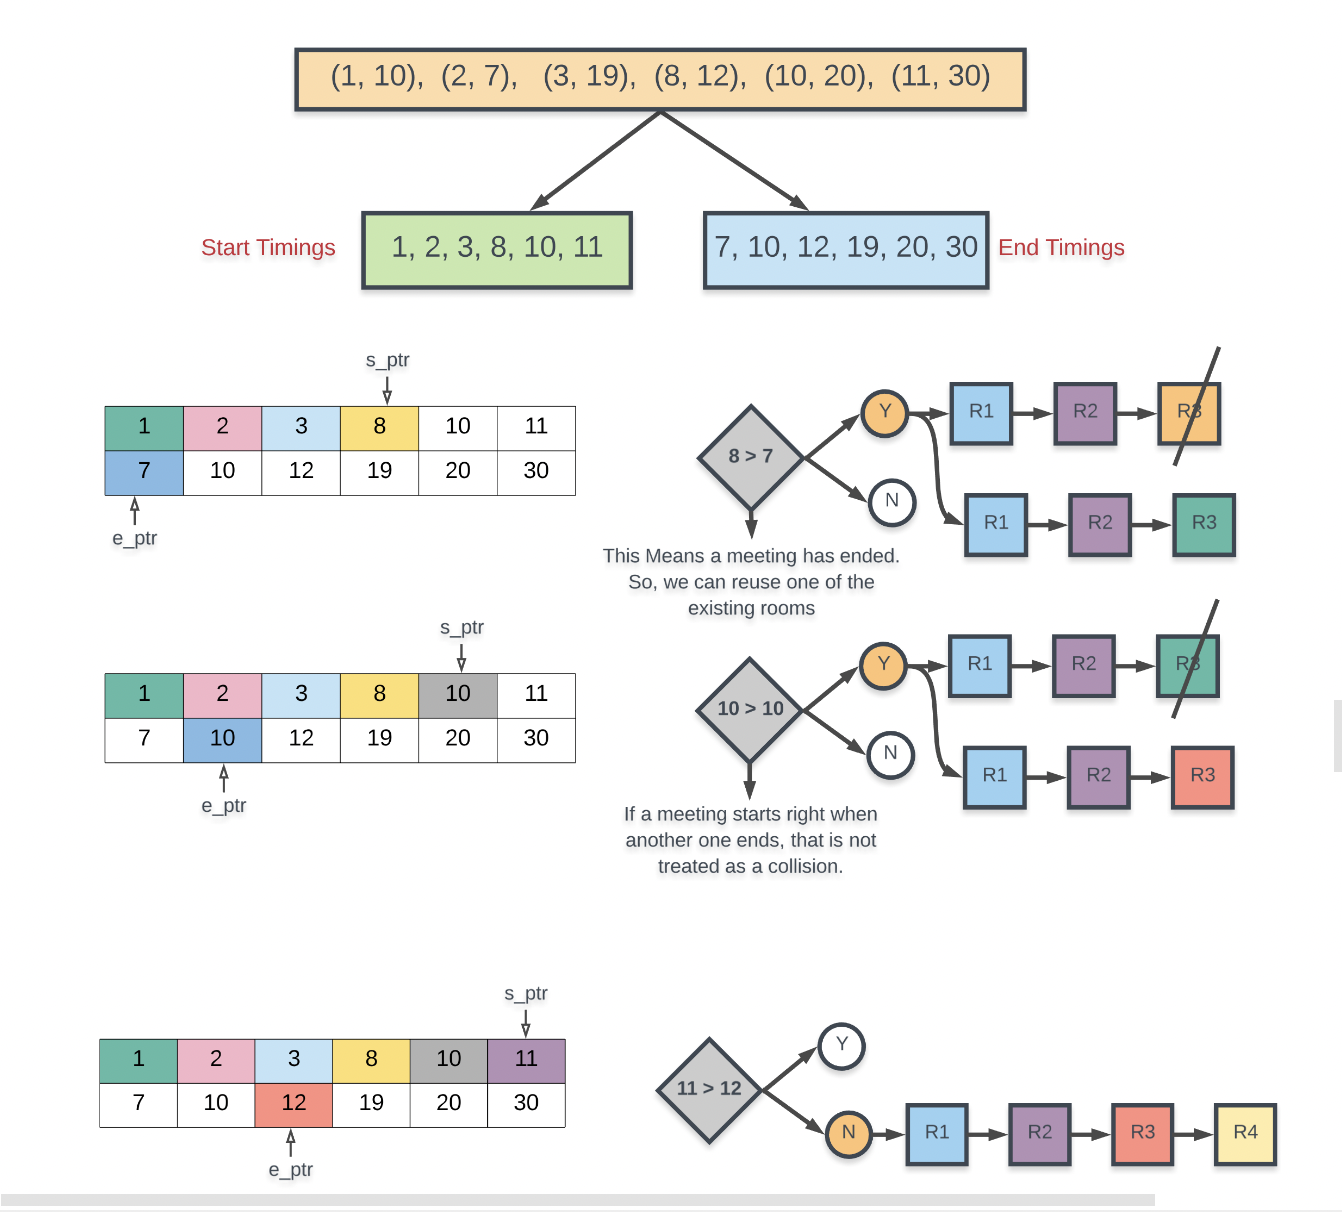



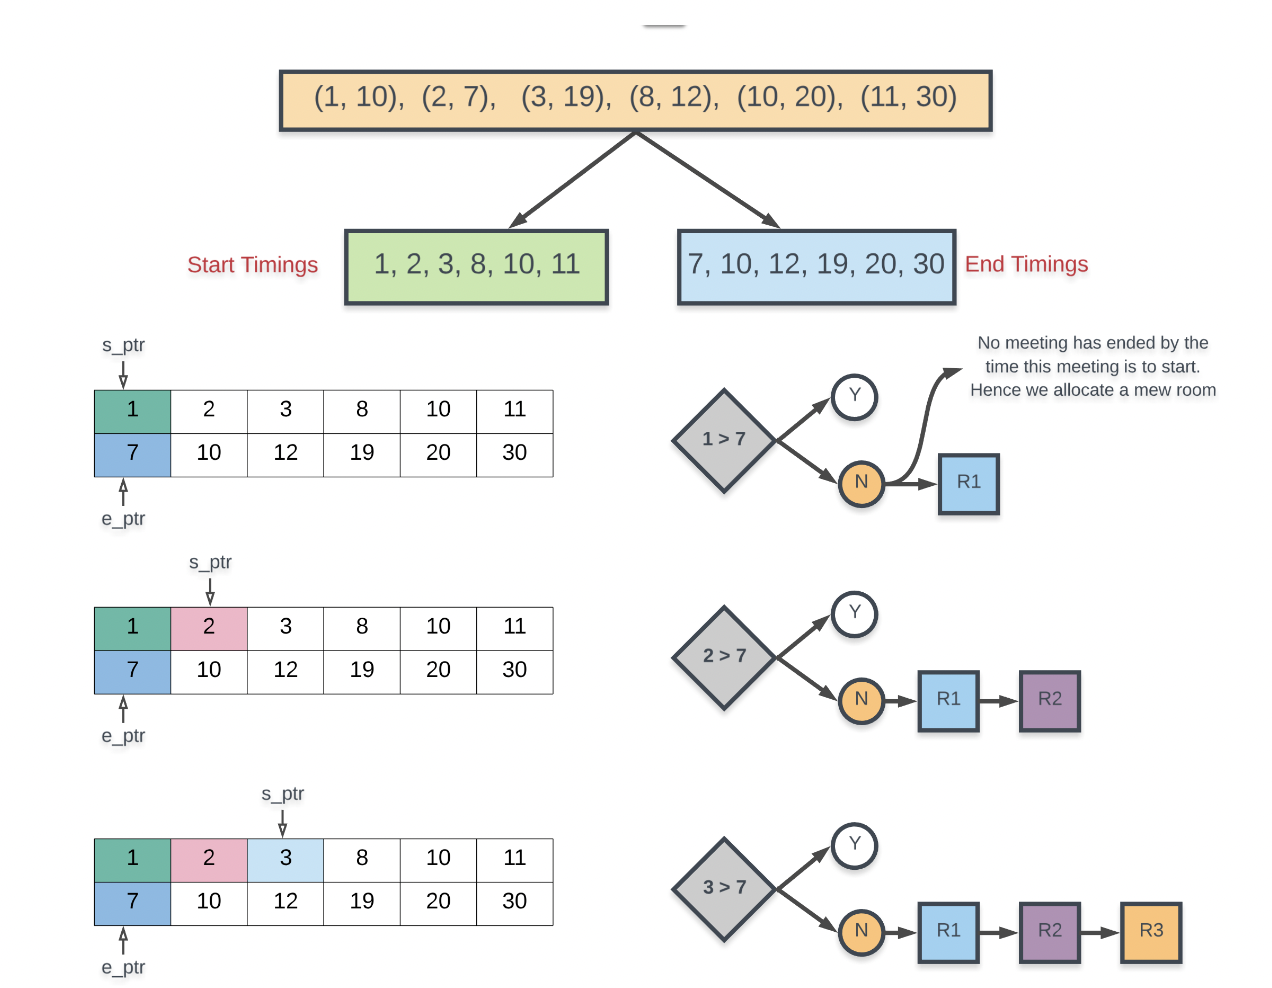

In [6]:
# My solution
class Solution1(object):
    def minMeetingRooms(self, intervals):
        """
        :type intervals: List[List[int]]
        :rtype: int
        """
        s_list = []
        e_list = []
        for i in intervals:
            s_list.append(i[0])
            e_list.append(i[1])
        s_list.sort()
        e_list.sort()
        
        s_pointer = 0
        e_pointer = 0
        
        count = 0
        
        n = len(intervals)
        while(s_pointer < n):
            if s_list[s_pointer] < e_list[e_pointer]:
                #s_pointer+=1
                count+=1
            else:
                #s_pointer+=1
                e_pointer+=1
            s_pointer+=1
        return count
                

In [8]:
s = Solution1()
intervals = [[0,30],[5,10],[15,20]]
print(s.minMeetingRooms(intervals))

2


In [4]:
#Leet code solution 
class Solution2(object):
    def minMeetingRooms(self, intervals):
        """
        :type intervals: List[List[int]]
        :rtype: int
        """
        # If there are no meetings, we don't need any rooms.
        if not intervals:
            return 0

        used_rooms = 0

        # Separate out the start and the end timings and sort them individually.
        start_timings = sorted([i[0] for i in intervals])
        end_timings = sorted(i[1] for i in intervals)
        L = len(intervals)

        # The two pointers in the algorithm: e_ptr and s_ptr.
        end_pointer = 0
        start_pointer = 0

        # Until all the meetings have been processed
        while start_pointer < L:
            # If there is a meeting that has ended by the time the meeting at `start_pointer` starts
            if start_timings[start_pointer] >= end_timings[end_pointer]:
                # Free up a room and increment the end_pointer.
                used_rooms -= 1
                end_pointer += 1

            # We do this irrespective of whether a room frees up or not.
            # If a room got free, then this used_rooms += 1 wouldn't have any effect. used_rooms would
            # remain the same in that case. If no room was free, then this would increase used_rooms
            used_rooms += 1    
            start_pointer += 1   

        return used_rooms

In [9]:
s = Solution2()
intervals = [[0,30],[5,10],[15,20]]
print(s.minMeetingRooms(intervals))

2
